# Welcome to the project of drug discovery for PPCHEM

### The aim of the project will be to create and train a ML model to predict the activity of potential drug molecules. In order to do this, we used 2 regressor and 2 deep learning models to predict the pIC50 values of molecules. This approach is inspired by a ligand based approach which relies on the quantitative-structure-activity relationship (QSAR).

In [1]:
import numpy as np
import rdkit as rd

In [2]:
! pip install chembl_webresource_client
! pip install seaborn
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
target = new_client.target
target_query = target.search('acetylcholinesterase')
possible_targets = pd.DataFrame.from_dict(target_query)
possible_targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,28.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,28.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
4,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
5,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
6,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
7,"[{'xref_id': 'P37136', 'xref_name': None, 'xre...",Rattus norvegicus,Acetylcholinesterase,15.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
8,"[{'xref_id': 'O42275', 'xref_name': None, 'xre...",Electrophorus electricus,Acetylcholinesterase,15.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
9,"[{'xref_id': 'P23795', 'xref_name': None, 'xre...",Bos taurus,Acetylcholinesterase,15.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913


Lets choose the one concerning humans

In [4]:
target = possible_targets.target_chembl_id[0]
target

'CHEMBL220'

We will base the activity estimation on the IC50

In [20]:
activity = new_client.activity
res = activity.filter(target_chembl_id=target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25111481,[],CHEMBL5265203,Inhibition of AChE (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.16
9087,None,None,25402914,[],CHEMBL5303778,Cross screening panel,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,pIC50,None,UO_0000065,None,5.1
9088,None,None,25402962,[],CHEMBL5303826,Cross screening panel,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,pIC50,None,UO_0000065,None,4.0
9089,None,None,25403899,[],CHEMBL5303876,Cross screening panel,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,pIC50,None,UO_0000065,None,4.2


Then lets do a bit of data cleaning

In [21]:
df_cleaned = df[df.standard_value.notna()]
df_cleaned = df_cleaned[df.canonical_smiles.notna()]
df_cleaned = df_cleaned.drop_duplicates(['canonical_smiles'])

df_cleaned



/var/folders/g8/mq_cbywj17g7tbgmmcy_bxm40000gn/T/ipykernel_19043/2338719627.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25111481,[],CHEMBL5265203,Inhibition of AChE (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.16
9087,None,None,25402914,[],CHEMBL5303778,Cross screening panel,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,pIC50,None,UO_0000065,None,5.1
9088,None,None,25402962,[],CHEMBL5303826,Cross screening panel,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,pIC50,None,UO_0000065,None,4.0
9089,None,None,25403899,[],CHEMBL5303876,Cross screening panel,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,pIC50,None,UO_0000065,None,4.2


Lets keep only the essential entries

In [22]:
df3 = df_cleaned[['molecule_chembl_id','canonical_smiles','standard_value']]
df3

has_nan = df3.isnull().values.any()
has_nan

False

Lets chose our descriptors, let begin with Lipinski descriptor and determine which one is active and which one is not 

In [23]:
from rdkit import Chem 
from rdkit.Chem import Descriptors, Lipinski


In [24]:
bioactivity = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity.append(0) #inactive
  elif float(i) <= 1000:
    bioactivity.append(2) #active
  else:
    bioactivity.append(1) #depends

df3['Bioactivity'] = bioactivity
df3.reset_index(drop=True, inplace=True)
df3

has_nan = df3.isnull().values.any()
has_nan

/var/folders/g8/mq_cbywj17g7tbgmmcy_bxm40000gn/T/ipykernel_19043/632185739.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Bioactivity'] = bioactivity


False

In [25]:
def lipinski(smiles):
    molec = []
    for i in smiles:
        mol = Chem.MolFromSmiles(i) 
        molec.append(mol)

    MW = []
    LogP = []
    NHDonors = []
    NHAcceptors = []

    for n in molec:        
        MW.append(Descriptors.MolWt(n))
        LogP.append(Descriptors.MolLogP(n))
        NHDonors.append(Lipinski.NumHDonors(n))
        NHAcceptors.append(Lipinski.NumHAcceptors(n))
        
    desc_data = pd.DataFrame({
        "Mw": MW,
        "H donors": NHDonors,
        "H acceptors": NHAcceptors,
        "Log P": LogP
    })
    
    return desc_data


df_lipinski = pd.concat([df3, lipinski(df3.canonical_smiles)], axis = 1)
df_lipinski.standard_value

df_lipinski['standard_value'] = pd.to_numeric(df_lipinski['standard_value'], errors='coerce')


# Filter rows with numerical 'standard_value'
df_lipinski = df_lipinski.loc[pd.notna(df_lipinski['standard_value'])]
df_lipinski


,molecule_chembl_id,canonical_smiles,standard_value,Bioactivity,Mw,H donors,H acceptors,Log P
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,2,312.325,0,6,2.80320
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,2,376.913,0,5,4.55460
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,0,426.851,0,5,5.35740
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,2,404.845,0,5,4.70690
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,2,346.334,0,6,3.09530
...,...,...,...,...,...,...,...,...
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.00,2,331.868,0,3,5.28790
6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28,1,414.477,3,4,3.95740
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.00,0,325.368,2,4,1.14840
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73,0,511.626,1,8,5.60034


Now lets change IC50 to pIC50 (apparently more efficient)

In [26]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop(columns=['standard_value'])  # Drop the 'standard_value' column

    return x

def pIC50(input):
    if 'standard_value_norm' not in input.columns:
        raise ValueError("Column 'standard_value_norm' does not exist in the DataFrame.")

    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i * (10**-9)  # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(columns=['standard_value_norm'])  # Drop the 'standard_value' column

    return x

# Apply the pIC50 function to df_lipinski
df_lipinski = norm_value(df_lipinski)
df_lipinski_pIC50 = pIC50(df_lipinski)
df_lipinski_pIC50

has_nan = df_lipinski_pIC50.isnull().values.any()
has_nan


/var/folders/g8/mq_cbywj17g7tbgmmcy_bxm40000gn/T/ipykernel_19043/1168239126.py:22: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))


False

Now lets evaluate what variable determine the activity
First lets keep only the clearly active and clearly inactive compounds

In [27]:
df_visu = df_lipinski_pIC50[df_lipinski_pIC50['Bioactivity'].isin([0, 2])]
df_visu.reset_index(drop=True, inplace=True)
df_visu

,molecule_chembl_id,canonical_smiles,Bioactivity,Mw,H donors,H acceptors,Log P,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,2,312.325,0,6,2.80320,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,2,376.913,0,5,4.55460,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,0,426.851,0,5,5.35740,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,2,404.845,0,5,4.70690,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,2,346.334,0,6,3.09530,6.096910
...,...,...,...,...,...,...,...,...
4746,CHEMBL2238280,Cc1ccc(C(=O)/C=C/c2ccc(N3CCCCC3)cc2)s1,2,311.450,0,3,4.94292,6.886057
4747,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,2,331.868,0,3,5.28790,6.795880
4748,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,0,325.368,2,4,1.14840,4.000000
4749,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,0,511.626,1,8,5.60034,4.200000


Text(0, 0.5, 'Frequency')

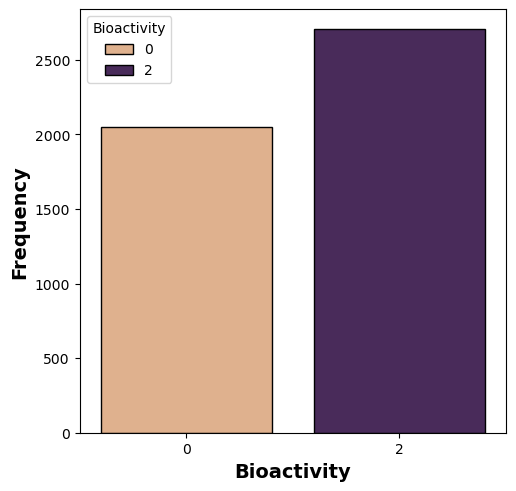

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5.5, 5.5))
#sns.color_palette("flare")
sns.countplot(x='Bioactivity', hue = 'Bioactivity', data=df_visu, edgecolor='black', palette = "flare")

plt.xlabel('Bioactivity', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('plot_bioactivity_class.pdf')

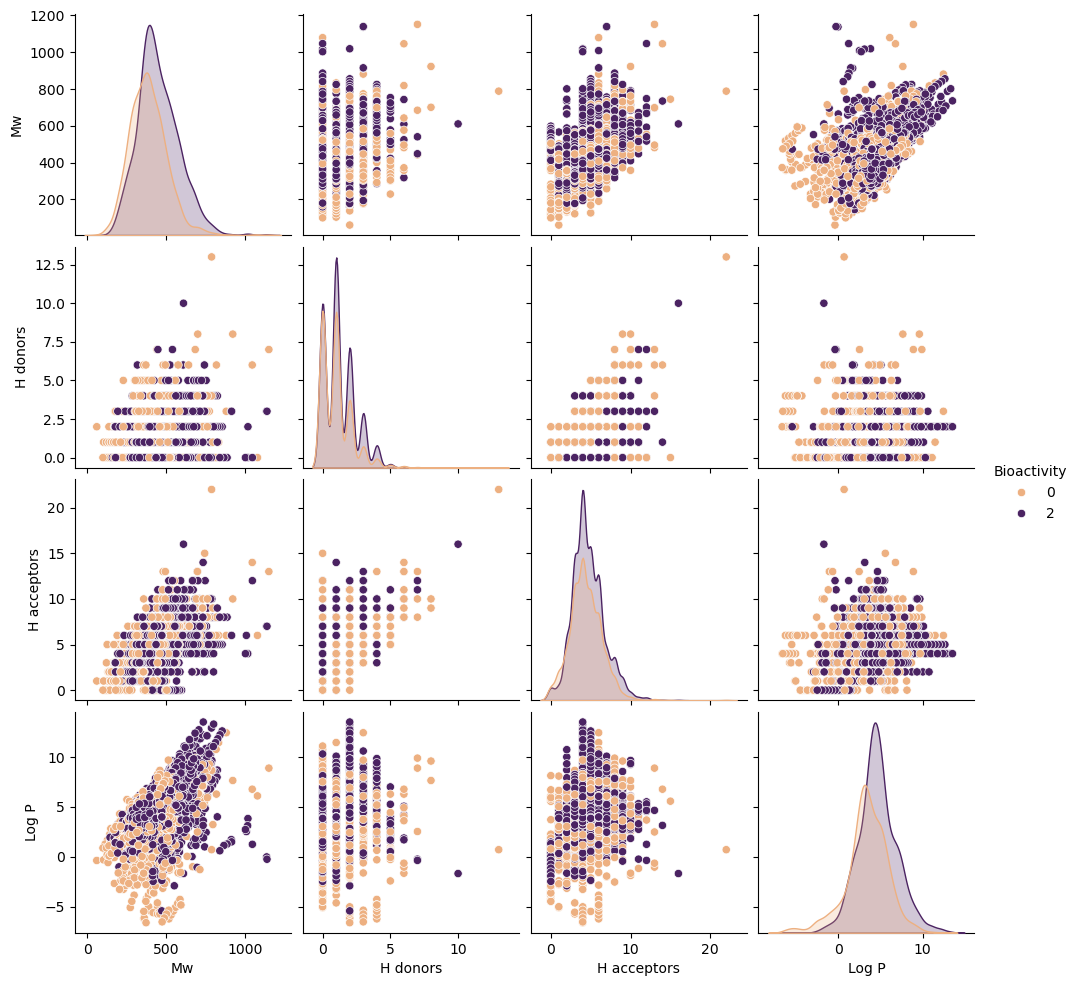

In [29]:
descriptors = ['Mw', 'H donors', 'H acceptors', 'Log P']
sns.pairplot(df_visu[descriptors + ['Bioactivity']], hue="Bioactivity", palette = "flare")

The data are clearly overlapping 

Lets increase the number of descriptor with rdkit:

In [30]:
def descriptors(smiles):
    mols = []

    for i in smiles:
        molec = Chem.MolFromSmiles(i)
        mols.append(molec)
    descrs = [Descriptors.CalcMolDescriptors(mol) for mol in mols]
    df_descr = pd.DataFrame(descrs)

    return df_descr
    

df_descr = descriptors(df_lipinski_pIC50.canonical_smiles)
df_descr = pd.concat([df_descr, df_lipinski_pIC50[['pIC50']]], axis=1)

# Let's replace infinities with NaN and then drop rows with any NaN values
df_descr.replace([np.inf, -np.inf], np.nan, inplace=True)
df_descr.dropna(inplace=True)

# Reset the index
df_descr.reset_index(drop=True, inplace=True)

df_descr 

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pIC50
0,11.818917,11.818917,0.048049,-0.603093,0.699960,10.478261,312.325,296.197,312.111007,118,...,0,0,0,0,0,0,0,0,0,6.124939
1,12.931567,12.931567,0.050268,-0.050268,0.734047,17.720000,376.913,355.745,376.112460,132,...,0,0,0,0,0,0,0,0,0,7.000000
2,12.859892,12.859892,0.135327,-4.406486,0.527034,11.464286,426.851,412.739,426.052894,146,...,0,0,0,0,0,0,0,0,0,4.301030
3,12.714518,12.714518,0.066807,-4.365026,0.695219,15.307692,404.845,388.717,404.068544,140,...,0,0,0,0,0,0,0,0,0,6.522879
4,12.136256,12.136256,0.238990,-4.744549,0.799502,11.391304,346.334,333.230,346.071131,124,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6326,12.045145,12.045145,0.041568,-0.041568,0.560263,15.409091,331.868,313.724,331.079763,114,...,0,0,0,0,0,0,1,0,0,6.795880
6327,14.806190,14.806190,0.063340,-0.743354,0.667777,19.600000,414.477,387.261,414.195486,160,...,0,0,0,0,0,0,0,0,0,5.100000
6328,12.553434,12.553434,0.030668,-0.497330,0.865213,13.375000,325.368,306.216,325.142641,124,...,0,0,0,0,0,0,0,0,0,4.000000
6329,6.559614,6.559614,0.049186,0.049186,0.290113,16.473684,511.626,478.362,511.258340,196,...,0,0,0,0,0,0,0,0,0,4.200000


lets choose the most relevent features:

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    

Now lets test out some models
We must always use 'scaler.transform(X_train)' on the 'X_test'
R/: Lets not that as we have a lot of features, the methods using 'distance' as KNN suffer from the high dimension curse

# 2. Model Building 

## 2.1 Data preparation

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn import preprocessing
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))


The X, Y variable matrixes are created and we look to fit_transform the X set
We see that 80 features have been dropped 

In [36]:
#remove the pIC50 column
X = df_descr.drop('pIC50', axis=1)
X1 = X

X = selection.fit_transform(X)
X_df = pd.DataFrame(X)

Y = df_descr['pIC50']


X1.shape, X_df.shape, Y.shape



((6331, 210), (6331, 131), (6331,))

It seems that the Y matrix has INF values that we need to replace before splitting

In [38]:
"""
# Replace infinities with NaN
Y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Let's get rid of NaN values (former infinities)
Y.dropna(inplace=True)

# We also need to drop the same rows from X_train_aligned
X_aligned = X_df.loc[Y.index]

X_aligned.shape, Y.shape
"""

"\n# Replace infinities with NaN\nY.replace([np.inf, -np.inf], np.nan, inplace=True)\n\n# Let's get rid of NaN values (former infinities)\nY.dropna(inplace=True)\n\n# We also need to drop the same rows from X_train_aligned\nX_aligned = X_df.loc[Y.index]\n\nX_aligned.shape, Y.shape\n"

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y, test_size=0.2)

X_train.shape, Y_train.shape
X_test.shape, Y_test.shape



((1267, 131), (1267,))

In [40]:
np.random.seed(100) 
#allows to fixate the model prediction performance (score) after first attempt 
#done by fixing the random number generation

## 2.2 RandomForest Model

### 2.2.1 Model Contruction

In [41]:

model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, Y_train)

Y_pred = model_rf.predict(X_test)

# Returns the R^2 value of the regression
r2_rf = model_rf.score(X_test, Y_test)
print(f"The score test of the RandomForest Model is R^2 ={r2_rf}")

# Some other evaluation metrics
mse_rf = mean_squared_error(Y_test, Y_pred)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(Y_test, Y_pred)

# Cross-Validation
cv_scores_rf = cross_val_score(model_rf, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {np.mean(-cv_scores_rf)}")

explained_variance_rf = explained_variance_score(Y_test, Y_pred)

print(f"The metrics calculated for the RF model are MSE: {mse_rf}, RMSE: {rmse_rf}, MAE: {mae_rf}, R^2: {r2_rf}, Explained Variance: {explained_variance_rf}")




The score test of the RandomForest Model is R^2 =0.6854635836154992
Cross-Validation MSE: 0.808252414738298
The metrics calculated for the RF model are MSE: 0.7779168590262898, RMSE: 0.8819959518196724, MAE: 0.6271970500991532, R^2: 0.6854635836154992, Explained Variance: 0.6862516057614556


### 2.2.2 Hyper paramter tuning
### Let's try to tune the hyper paramters of the model with RandomizedSearch - This will take a moment 

In [49]:
from sklearn.model_selection import RandomizedSearchCV

# We define here the parameter distribution
param_distributions = {
    'n_estimators': [10, 30, 50, 100, 150],
    'max_depth': [None, 2, 16, 32],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model_rf2 = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_rf2, param_distributions=param_distributions, n_iter=25, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Fit the model
random_search.fit(X_train, Y_train)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best score: -0.8058379273942373


Let's create a new model with tuned hyper parameters

In [50]:
# Best parameters found from RandomizedSearchCV
opt_params = {
    'n_estimators': 100,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_depth': 16  
}


model_rf2 = RandomForestRegressor(**opt_params, random_state=42)

# Assuming X_train and Y_train are your training data and labels
model_rf2.fit(X_train, Y_train)

Y_pred_2 = model_rf.predict(X_test)


# Returns the R^2 value of the regression
r2_rf2 = model_rf2.score(X_test, Y_test)
print(f"The score test of the optimized RandomForest Model is R^2 ={r2_rf2}")

# Some other evaluation metrics
mse_rf2 = mean_squared_error(Y_test, Y_pred_2)
rmse_rf2 = np.sqrt(mse_rf2)
mae_rf2 = mean_absolute_error(Y_test, Y_pred_2)

# Cross-Validation
cv_scores_rf2 = cross_val_score(model_rf, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {np.mean(-cv_scores_rf2)}")

explained_variance_rf2 = explained_variance_score(Y_test, Y_pred_2)

print(f"The metrics calculated for the RF model are MSE: {mse_rf2}, RMSE: {rmse_rf2}, MAE: {mae_rf2}, R^2: {r2_rf2}, Explained Variance: {explained_variance_rf2}")





The score test of the optimized RandomForest Model is R^2 =0.6820476770791395
Cross-Validation MSE: 0.8021133617770833
The metrics calculated for the RF model are MSE: 0.7851458645297678, RMSE: 0.8860845696262676, MAE: 0.6369924348998199, R^2: 0.6820476770791395, Explained Variance: 0.6834573627421182


## Let's try to compare if the new model has better performances 

In [52]:
metrics1 = {'MSE' : mse_rf, 'RMSE' : rmse_rf, 'MAE' : mae_rf, 'R^2' : r2_rf, 'explained_variance' : explained_variance_rf}
metrics2 = {'MSE' : mse_rf2, 'RMSE' : rmse_rf2, 'MAE' : mae_rf2, 'R^2' : r2_rf2, 'explained_variance' : explained_variance_rf2}

for met in metrics2:
    ini_value = metrics1[met]
    fin_value = metrics2[met]
    
    [met]
    diff = fin_value - ini_value
    percentage_change = (diff / ini_value) * 100
 
    if diff < 0:
        print(f"{met} decreased by {-diff} (or {-percentage_change:.2f}%) from {ini_value} to {fin_value}")
    else:
        print(f"{met} increased by {diff} (or {percentage_change:.2f}%) from {ini_value} to {fin_value}")




MSE increased by 0.007229005503477937 (or 0.93%) from 0.7779168590262898 to 0.7851458645297678
RMSE increased by 0.004088617806595196 (or 0.46%) from 0.8819959518196724 to 0.8860845696262676
MAE increased by 0.009795384800666773 (or 1.56%) from 0.6271970500991532 to 0.6369924348998199
R^2 decreased by 0.003415906536359703 (or 0.50%) from 0.6854635836154992 to 0.6820476770791395
explained_variance decreased by 0.0027942430193373946 (or 0.41%) from 0.6862516057614556 to 0.6834573627421182


### 2.2.3 Performance Visualisation

/Users/davidsegura/miniconda3/envs/ppchem/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


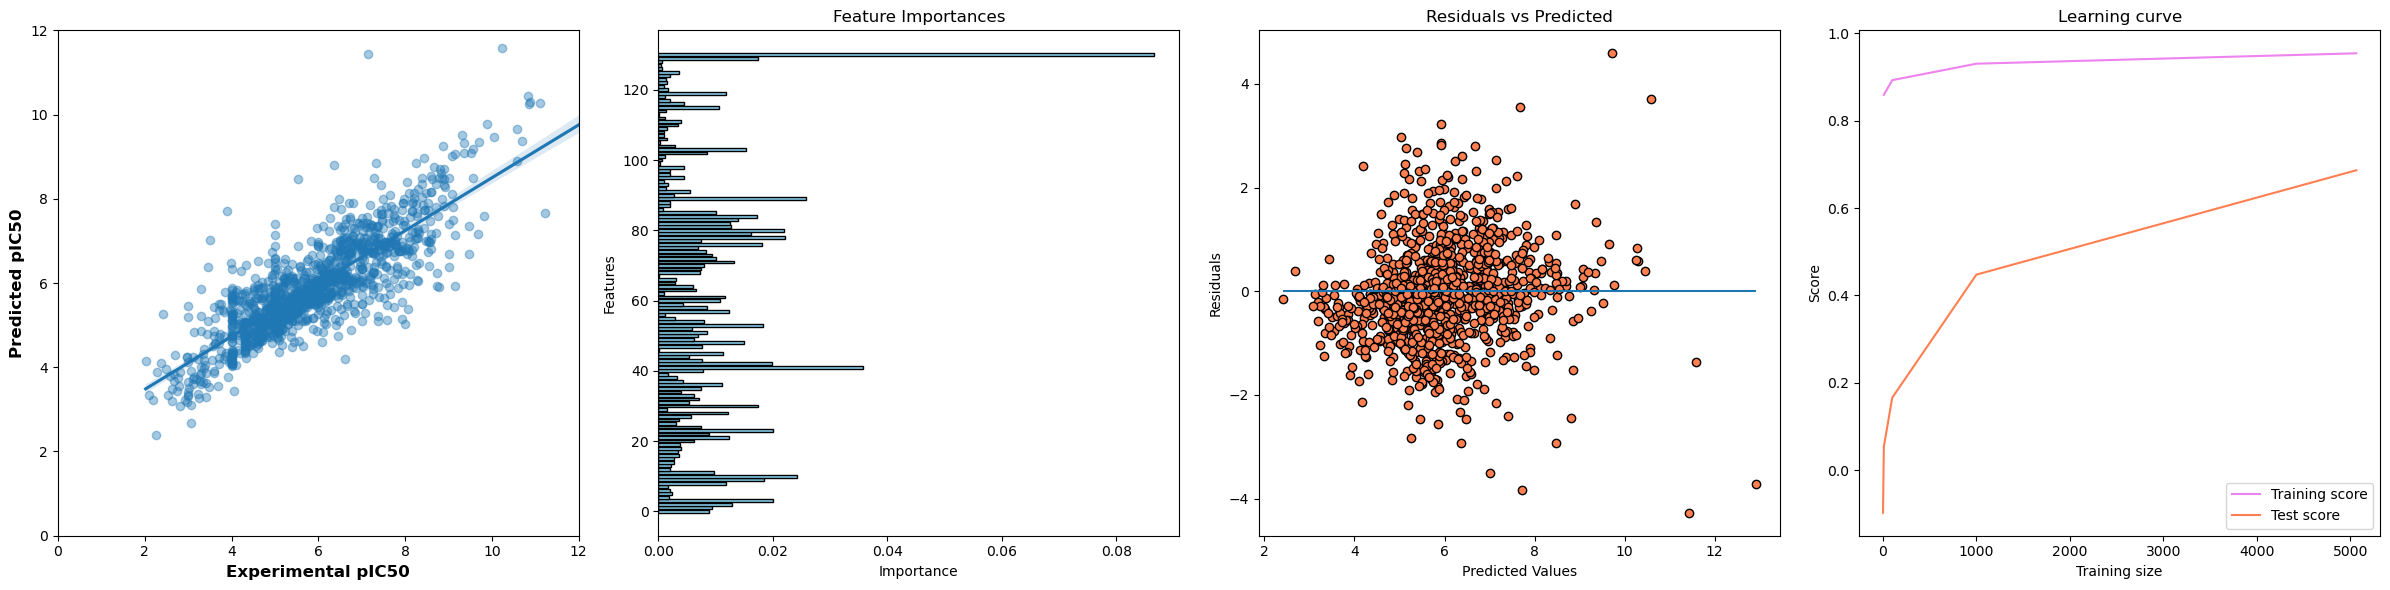

In [53]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))  # Adjust the figure size as needed

# Plot 1: Regplot of Predicted vs Experimental pIC50
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4}, ax=axs[0])
axs[0].set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
axs[0].set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
axs[0].set_xlim(0, 12)
axs[0].set_ylim(0, 12)

# Plot 2: Feature Importances
feature_importances = model_rf.feature_importances_
axs[1].barh(range(len(feature_importances)), feature_importances, edgecolor='black', color='skyblue')
axs[1].set_xlabel('Importance')
axs[1].set_ylabel('Features')
axs[1].set_title('Feature Importances')

# Plot 3: Residuals vs Predicted
residuals = Y_test - Y_pred
axs[2].scatter(Y_pred, residuals, edgecolor='black', color='coral')
axs[2].hlines(y=0, xmin=Y_pred.min(), xmax=Y_pred.max())
axs[2].set_xlabel('Predicted Values')
axs[2].set_ylabel('Residuals')
axs[2].set_title('Residuals vs Predicted')

# Plot 4: Learning Curve
train_sizes = [1, 10, 100, 1000, len(X_train)-1]
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train, Y_train, train_size=train_size, random_state=42)
    model_rf.fit(X_slice, y_slice)
    train_scores.append(model_rf.score(X_slice, y_slice))
    test_scores.append(model_rf.score(X_test, Y_test))

axs[3].plot(train_sizes, train_scores, label='Training score', color = 'violet')
axs[3].plot(train_sizes, test_scores, label='Test score', color = 'coral')
axs[3].set_xlabel('Training size')
axs[3].set_ylabel('Score')
axs[3].legend()
axs[3].set_title('Learning curve')

plt.tight_layout()  
plt.show()



/Users/davidsegura/miniconda3/envs/ppchem/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


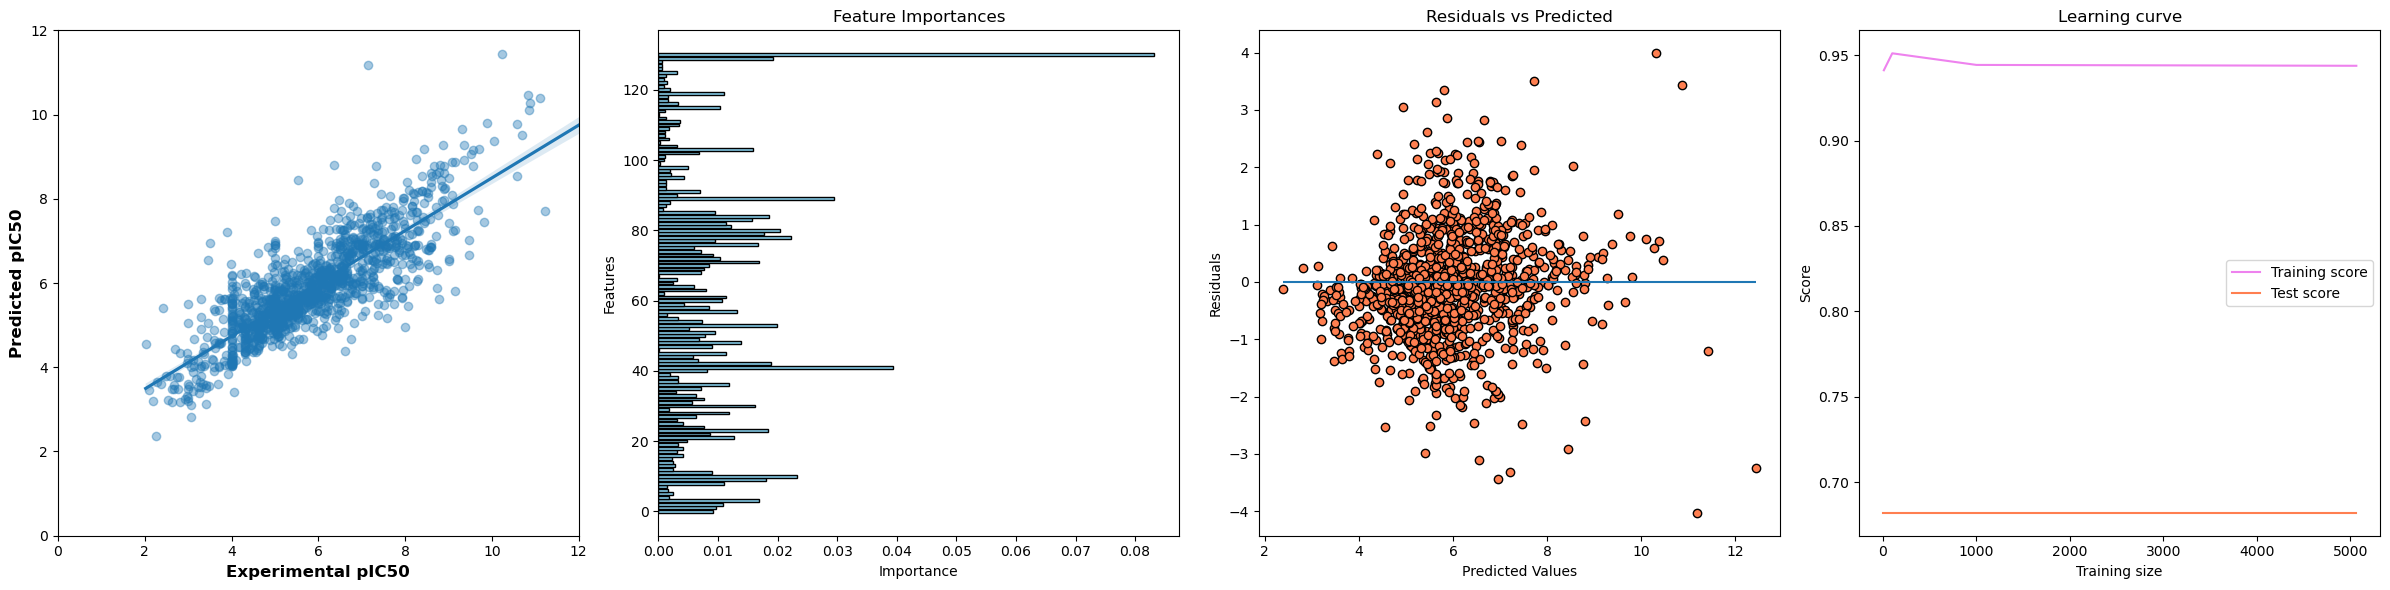

In [54]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))  # Adjust the figure size as needed

# Plot 1: Regplot of Predicted vs Experimental pIC50
sns.regplot(x=Y_test, y=Y_pred_2, scatter_kws={'alpha':0.4}, ax=axs[0])
axs[0].set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
axs[0].set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
axs[0].set_xlim(0, 12)
axs[0].set_ylim(0, 12)

# Plot 2: Feature Importances
feature_importances = model_rf.feature_importances_
axs[1].barh(range(len(feature_importances)), feature_importances, edgecolor='black', color='skyblue')
axs[1].set_xlabel('Importance')
axs[1].set_ylabel('Features')
axs[1].set_title('Feature Importances')

# Plot 3: Residuals vs Predicted
residuals = Y_test - Y_pred_2
axs[2].scatter(Y_pred_2, residuals, edgecolor='black', color='coral')
axs[2].hlines(y=0, xmin=Y_pred_2.min(), xmax=Y_pred_2.max())
axs[2].set_xlabel('Predicted Values')
axs[2].set_ylabel('Residuals')
axs[2].set_title('Residuals vs Predicted')

# Plot 4: Learning Curve
train_sizes = [1, 10, 100, 1000, len(X_train)-1]
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train, Y_train, train_size=train_size, random_state=42)
    model_rf.fit(X_slice, y_slice)
    train_scores.append(model_rf2.score(X_slice, y_slice))
    test_scores.append(model_rf2.score(X_test, Y_test))

axs[3].plot(train_sizes, train_scores, label='Training score', color = 'violet')
axs[3].plot(train_sizes, test_scores, label='Test score', color = 'coral')
axs[3].set_xlabel('Training size')
axs[3].set_ylabel('Score')
axs[3].legend()
axs[3].set_title('Learning curve')

plt.tight_layout()  
plt.show()




## 2.3 Gradient Boosting Machines (GBMs)

### 2.3.1 Model Construction 

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

In [56]:

X_train.shape, Y_train.shape
X_test.shape, Y_test.shape

model_gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)

model_gbm.fit(X_train, Y_train)

Y_pred_gbm = model_gbm.predict(X_test)

# Returns the R^2 value of the regression
r2_gbm = model_gbm.score(X_test, Y_test)
print(f"The score test of the Gradient Boosting Machines is R^2 ={r2_gbm}")


# Some other evaluation metrics
mse_gbm = mean_squared_error(Y_test, Y_pred_gbm)
rmse_gbm = np.sqrt(mse_gbm)
mae_gbm = mean_absolute_error(Y_test, Y_pred_gbm)

# Cross-Validation
cv_scores_gbm = cross_val_score(model_gbm, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {np.mean(-cv_scores_gbm)}")

explained_variance_gbm = explained_variance_score(Y_test, Y_pred_gbm)

print(f"The metrics calculated for the RF model are MSE: {mse_gbm}, RMSE: {rmse_gbm}, MAE: {mae_gbm}, R^2: {r2_gbm}, Explained Variance: {explained_variance_gbm}")




The score test of the Gradient Boosting Machines is R^2 =0.549706444900837
Cross-Validation MSE: 1.1339819108596547
The metrics calculated for the RF model are MSE: 1.1136737426114565, RMSE: 1.0553074161643405, MAE: 0.8162358445554062, R^2: 0.549706444900837, Explained Variance: 0.5499974871372194


### 2.3.3 Hyper parameter tuning 

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

In [58]:
param_dist = {
    "n_estimators": sp_randint(100, 300),  
    "learning_rate": uniform(0.01, 0.1),  
    "max_depth": sp_randint(3, 5),  
    "min_samples_split": sp_randint(2, 6),
    "min_samples_leaf": sp_randint(1, 4),
    "subsample": uniform(0.7, 0.3)  
}

# Initialize the base model
model_gbm2 = GradientBoostingRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model_gbm2, param_distributions=param_dist,
                                   n_iter=10, cv=3, random_state=42, scoring='neg_mean_squared_error')

random_search.fit(X_train, Y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

#best_gbm = random_search.best_estimator_

Best parameters found:  {'learning_rate': 0.10385527090157502, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 157, 'subsample': 0.8574269294896713}
Best score found:  -0.8969745583330354


In [59]:
best_params = {
    'learning_rate': 0.10385527090157502,
    'max_depth': 4,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 157,
    'subsample': 0.8574269294896713
}

model_gbm2 = GradientBoostingRegressor(**best_params, random_state=42)

model_gbm2.fit(X_train, Y_train)

Y_pred_gbm2 = model_gbm2.predict(X_test)

# Returns the R^2 value of the regression
r2_gbm2 = model_gbm2.score(X_test, Y_test)
print(f"The score test of the Gradient Boosting Machines is R^2 ={r2_gbm2}")


# Some other evaluation metrics
mse_gbm2 = mean_squared_error(Y_test, Y_pred_gbm2)
rmse_gbm2 = np.sqrt(mse_gbm2)
mae_gbm2 = mean_absolute_error(Y_test, Y_pred_gbm2)

# Cross-Validation
cv_scores_gbm2 = cross_val_score(model_gbm2, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {np.mean(-cv_scores_gbm2)}")

explained_variance_gbm2 = explained_variance_score(Y_test, Y_pred_gbm2)

print(f"The metrics calculated for the RF model are MSE: {mse_gbm2}, RMSE: {rmse_gbm2}, MAE: {mae_gbm2}, R^2: {r2_gbm2}, Explained Variance: {explained_variance_gbm2}")


The score test of the Gradient Boosting Machines is R^2 =0.6531908973764273
Cross-Validation MSE: 0.8620158529320815
The metrics calculated for the RF model are MSE: 0.8577342200810743, RMSE: 0.9261394171943413, MAE: 0.6897649050239316, R^2: 0.6531908973764273, Explained Variance: 0.6533467241976558


Performance change in % after tuning the hyperparameters 


In [60]:
metrics1 = {'MSE' : mse_gbm, 'RMSE' : rmse_gbm, 'MAE' : mae_gbm, 'R^2' : r2_gbm, 'explained_variance' : explained_variance_gbm}
metrics2 = {'MSE' : mse_gbm2, 'RMSE' : rmse_gbm2, 'MAE' : mae_gbm2, 'R^2' : r2_gbm2, 'explained_variance' : explained_variance_gbm2}

for met in metrics2:
    ini_value = metrics1[met]
    fin_value = metrics2[met]
    
    [met]
    diff = fin_value - ini_value
    percentage_change = (diff / ini_value) * 100
 
    if diff < 0:
        print(f"{met} decreased by {-diff} (or {-percentage_change:.2f}%) from {ini_value} to {fin_value}")
    else:
        print(f"{met} increased by {diff} (or {percentage_change:.2f}%) from {ini_value} to {fin_value}")


MSE decreased by 0.2559395225303822 (or 22.98%) from 1.1136737426114565 to 0.8577342200810743
RMSE decreased by 0.1291679989699992 (or 12.24%) from 1.0553074161643405 to 0.9261394171943413
MAE decreased by 0.1264709395314746 (or 15.49%) from 0.8162358445554062 to 0.6897649050239316
R^2 increased by 0.10348445247559035 (or 18.83%) from 0.549706444900837 to 0.6531908973764273
explained_variance increased by 0.10334923706043642 (or 18.79%) from 0.5499974871372194 to 0.6533467241976558


### 2.3.2 Performance Visualisation 



/Users/davidsegura/miniconda3/envs/ppchem/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


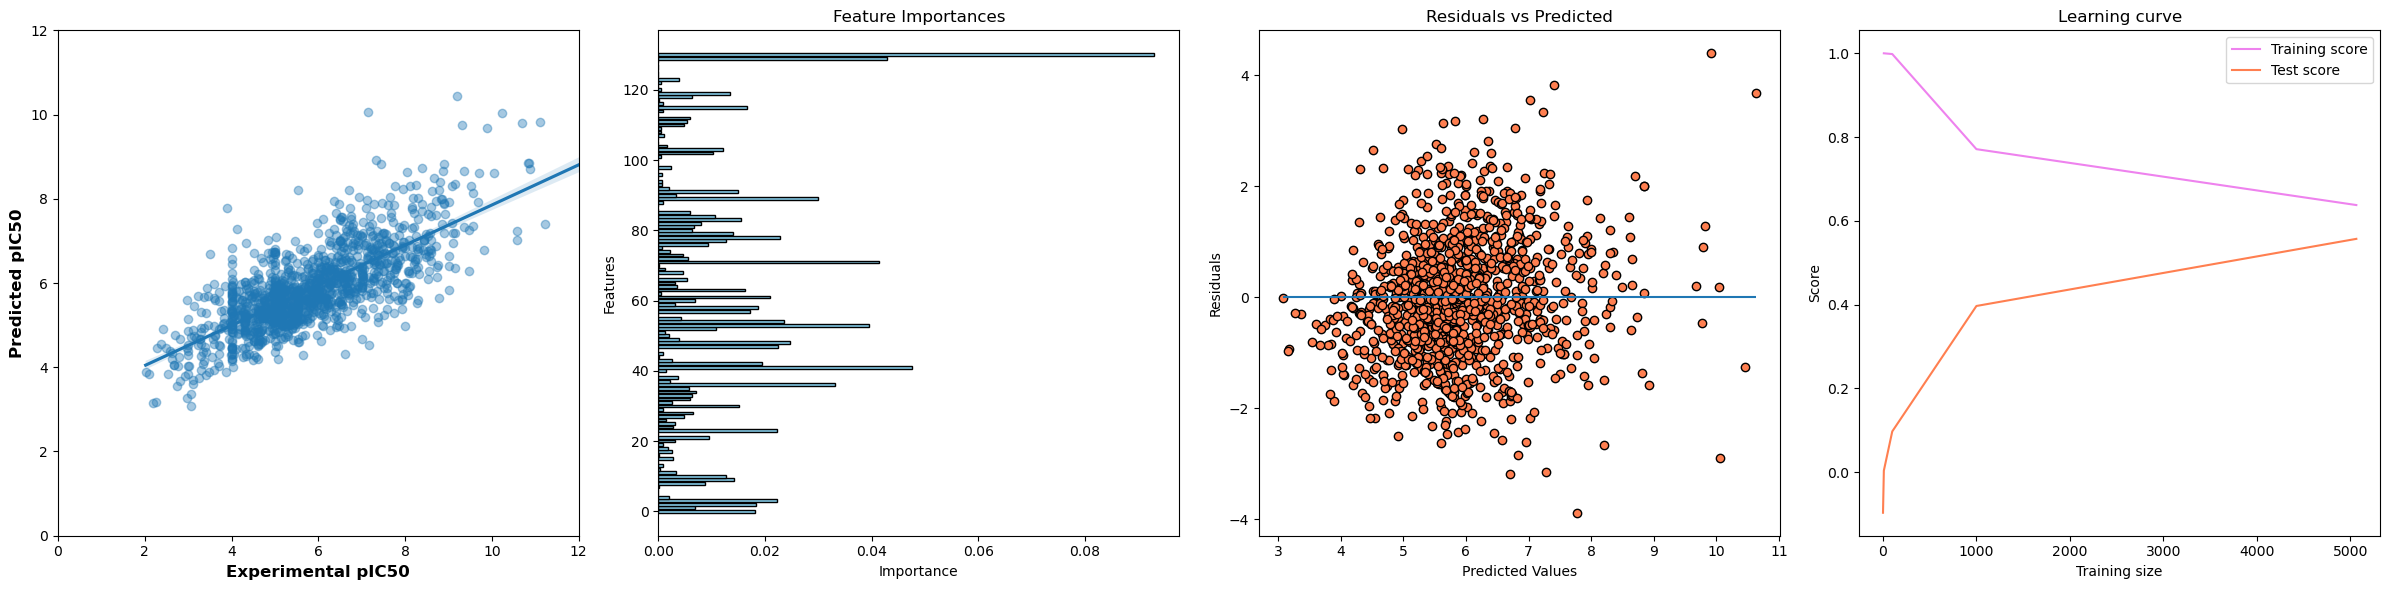

In [61]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))  # Adjust the figure size as needed

# Plot 1: Regplot of Predicted vs Experimental pIC50
sns.regplot(x=Y_test, y=Y_pred_gbm, scatter_kws={'alpha':0.4}, ax=axs[0])
axs[0].set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
axs[0].set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
axs[0].set_xlim(0, 12)
axs[0].set_ylim(0, 12)

# Plot 2: Feature Importances
feature_importances = model_gbm.feature_importances_
axs[1].barh(range(len(feature_importances)), feature_importances, edgecolor='black', color='skyblue')
axs[1].set_xlabel('Importance')
axs[1].set_ylabel('Features')
axs[1].set_title('Feature Importances')

# Plot 3: Residuals vs Predicted
residuals = Y_test - Y_pred_gbm
axs[2].scatter(Y_pred_gbm, residuals, edgecolor='black', color='coral')
axs[2].hlines(y=0, xmin=Y_pred_gbm.min(), xmax=Y_pred_gbm.max())
axs[2].set_xlabel('Predicted Values')
axs[2].set_ylabel('Residuals')
axs[2].set_title('Residuals vs Predicted')

# Plot 4: Learning Curve
train_sizes = [1, 10, 100, 1000, len(X_train)-1]
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train, Y_train, train_size=train_size, random_state=42)
    model_gbm.fit(X_slice, y_slice)
    train_scores.append(model_gbm.score(X_slice, y_slice))
    test_scores.append(model_gbm.score(X_test, Y_test))

axs[3].plot(train_sizes, train_scores, label='Training score', color = 'violet')
axs[3].plot(train_sizes, test_scores, label='Test score', color = 'coral')
axs[3].set_xlabel('Training size')
axs[3].set_ylabel('Score')
axs[3].legend()
axs[3].set_title('Learning curve')

plt.tight_layout()  
plt.show()




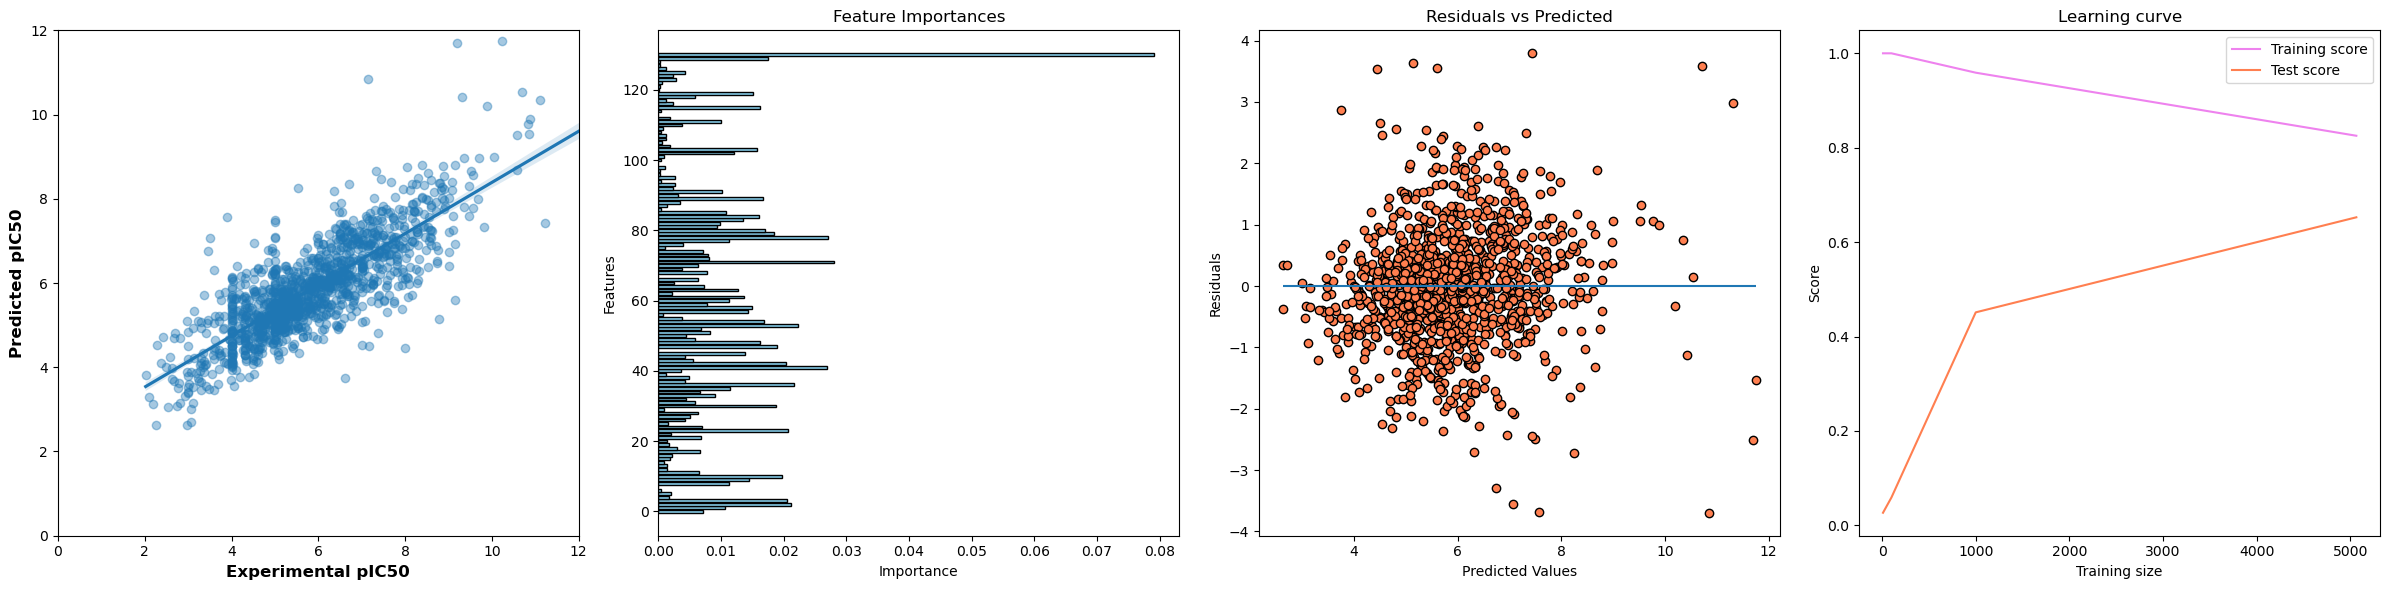

In [62]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))  # Adjust the figure size as needed

# Plot 1: Regplot of Predicted vs Experimental pIC50
sns.regplot(x=Y_test, y=Y_pred_gbm2, scatter_kws={'alpha':0.4}, ax=axs[0])
axs[0].set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
axs[0].set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
axs[0].set_xlim(0, 12)
axs[0].set_ylim(0, 12)

model_gbm2.fit(X_train, Y_train)

# Plot 2: Feature Importances
feature_importances = model_gbm2.feature_importances_
axs[1].barh(range(len(feature_importances)), feature_importances, edgecolor='black', color='skyblue')
axs[1].set_xlabel('Importance')
axs[1].set_ylabel('Features')
axs[1].set_title('Feature Importances')

# Plot 3: Residuals vs Predicted
residuals = Y_test - Y_pred_gbm2
axs[2].scatter(Y_pred_gbm2, residuals, edgecolor='black', color='coral')
axs[2].hlines(y=0, xmin=Y_pred_gbm2.min(), xmax=Y_pred_gbm2.max())
axs[2].set_xlabel('Predicted Values')
axs[2].set_ylabel('Residuals')
axs[2].set_title('Residuals vs Predicted')

# Plot 4: Learning Curve
train_sizes = [10, 100, 1000, len(X_train)-1]
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train, Y_train, train_size=train_size, random_state=42)
    model_gbm2.fit(X_slice, y_slice)
    train_scores.append(model_gbm2.score(X_slice, y_slice))
    test_scores.append(model_gbm2.score(X_test, Y_test))

axs[3].plot(train_sizes, train_scores, label='Training score', color = 'violet')
axs[3].plot(train_sizes, test_scores, label='Test score', color = 'coral')
axs[3].set_xlabel('Training size')
axs[3].set_ylabel('Score')
axs[3].legend()
axs[3].set_title('Learning curve')

plt.tight_layout()  
plt.show()



## 2.4 Fully Connected (Dense) Neural Network

In [63]:
!pip install tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler


### 2.4.1 Model Contruction

In [64]:
# The NN cannot fit in the case of excessive values, let's apply a scaling function
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# This will get the number of features / descriptors in the dataset 
num_features = X_train_scaled.shape[1]  

model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(num_features,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Output layer for regression
])

model_nn.compile(optimizer='adam', loss='mean_squared_error')


history = model_nn.fit(X_train_scaled, Y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, Y_test))






Epoch 1/100


/Users/davidsegura/miniconda3/envs/ppchem/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 8.8392 - val_loss: 2.3186
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 2.6096 - val_loss: 1.7975
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 2.3048 - val_loss: 1.6347
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 2.0020 - val_loss: 1.6411
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 1.8855 - val_loss: 1.4373
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 1.7827 - val_loss: 1.5077
Epoch 7/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 1.7876 - val_loss: 1.4263
Epoch 8/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 1.6380 - val_loss: 1.3405
Epoch 9/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 1.6379 - val_loss: 1.3446
Epoch 10/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 1.5839 - val_loss: 1.3316
Epoch 11/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 1.5840 - val_loss: 1.2431
Epoch 12/100
159/159 ━━━━━━━━━━

Let's try to find the validation loss on the NN model

In [65]:
val_loss = model_nn.evaluate(X_test_scaled, Y_test)
print(f"Validation loss: {val_loss}")

Y_pred_nn = model_nn.predict(X_test_scaled)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.9273
Validation loss: 0.9011764526367188
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step


Let's evalute the performances with other metrics 

In [66]:
mse_nn = mean_squared_error(Y_test, Y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
mae_nn = mean_absolute_error(Y_test, Y_pred_nn)
r2_nn = r2_score(Y_test, Y_pred_nn)
explained_variance_nn = explained_variance_score(Y_test, Y_pred_nn)


print(f"The metrics calculated for the NN model are MSE: {mse_nn}, RMSE: {rmse_nn}, MAE: {mae_nn}, R^2: {r2_nn}, Explained Variance: {explained_variance_nn}")


The metrics calculated for the NN model are MSE: 0.8996971348984233, RMSE: 0.9485236606950948, MAE: 0.6939539201392361, R^2: 0.6362239622926218, Explained Variance: 0.6635400463723218


### 2.4.2 Hyper parameter tuning

In [67]:
!pip install keras-tuner
import keras_tuner as kt


In [68]:
# This function will take hyperparameters as input and outputs a model

def create_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train_scaled.shape[1],)))
    for i in range(hp.Int('n_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_layer_{i}', min_value=32, max_value=512, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_'+str(i), min_value=0.0, max_value=0.5, default=0.2, step=0.1)))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd']),
                  loss='mean_squared_error',
                  metrics=['mean_squared_error'])
    
    return model

In [69]:
# Let's use on of the function on the keras-tuner package to find the optimal hyper parameters with RandomSearch tool
tuner = kt.RandomSearch(create_model,
                        objective='val_mean_squared_error',
                        max_trials=10,  # Number of trials to run
                        executions_per_trial=1,  # Number of models to train for each trial
                        directory='my_dir',  # Directory to store logs
                        project_name='keras_tuner_demo')

tuner.search(X_train_scaled, Y_train, epochs=10, validation_split=0.1)

Trial 10 Complete [00h 00m 02s]
val_mean_squared_error: 1.396116852760315

Best val_mean_squared_error So Far: 0.9383899569511414
Total elapsed time: 00h 00m 21s


In [70]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hp
model_nn2 = tuner.hypermodel.build(best_hps)

# Train the best model
history = model_nn2.fit(X_train_scaled, Y_train, epochs=50, validation_split=0.1)

Y_pred_nn2 = model_nn2.predict(X_test_scaled)

# Evaluate on test data
val_loss2 = model_nn2.evaluate(X_test_scaled, Y_test)
print(f"Validation loss: {val_loss2}")

mse_nn2 = mean_squared_error(Y_test, Y_pred_nn2)
rmse_nn2 = np.sqrt(mse_nn2)
mae_nn2 = mean_absolute_error(Y_test, Y_pred_nn2)
r2_nn2 = r2_score(Y_test, Y_pred_nn2)
explained_variance_nn2 = explained_variance_score(Y_test, Y_pred_nn2)


print(f"The metrics calculated for the NN model are MSE: {mse_nn2}, RMSE: {rmse_nn2}, MAE: {mae_nn2}, R^2: {r2_nn2}, Explained Variance: {explained_variance_nn2}")


Epoch 1/50


/Users/davidsegura/miniconda3/envs/ppchem/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1737 - mean_squared_error: 7.1738 - val_loss: 1.9886 - val_mean_squared_error: 1.9923
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 2.2879 - mean_squared_error: 2.2878 - val_loss: 1.6517 - val_mean_squared_error: 1.6574
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 1.9350 - mean_squared_error: 1.9349 - val_loss: 1.5286 - val_mean_squared_error: 1.5344
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 1.6728 - mean_squared_error: 1.6728 - val_loss: 1.4371 - val_mean_squared_error: 1.4434
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 1.5011 - mean_squared_error: 1.5011 - val_loss: 1.1679 - val_mean_squared_error: 1.1738
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 1.3916 - mean_squared_error: 1.3916 - val_loss: 1.1266 - val_mean_squared_error: 1.1320
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 1.1777 - mean_squared_error: 1.1777 - val_loss: 1.0

In [71]:
metrics1 = {'MSE' : mse_nn, 'RMSE' : rmse_nn, 'MAE' : mae_nn, 'R^2' : r2_nn, 'explained_variance' : explained_variance_nn }
metrics2 = {'MSE' : mse_nn2, 'RMSE' : rmse_nn2, 'MAE' : mae_nn2, 'R^2' : r2_nn2, 'explained_variance' : explained_variance_nn2 }

for met in metrics2:
    ini_value = metrics1[met]
    fin_value = metrics2[met]
    
    [met]
    diff = fin_value - ini_value
    percentage_change = (diff / ini_value) * 100
 
    if diff < 0:
        print(f"{met} decreased by {-diff} (or {-percentage_change:.2f}%) from {ini_value} to {fin_value}")
    else:
        print(f"{met} increased by {diff} (or {percentage_change:.2f}%) from {ini_value} to {fin_value}")

print(f"Also validation losses went from {val_loss} to {val_loss2}")

MSE decreased by 0.04686319093305891 (or 5.21%) from 0.8996971348984233 to 0.8528339439653644
RMSE decreased by 0.02503357197439582 (or 2.64%) from 0.9485236606950948 to 0.9234900887206989
MAE decreased by 0.027702327949581607 (or 3.99%) from 0.6939539201392361 to 0.6662515921896545
R^2 increased by 0.018948271869152045 (or 2.98%) from 0.6362239622926218 to 0.6551722341617738
explained_variance decreased by 0.006582603870961212 (or 0.99%) from 0.6635400463723218 to 0.6569574425013606
Also validation losses went from 0.9011764526367188 to [0.8549543619155884, 0.8528339862823486]


# NN - Model

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn import preprocessing
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))  
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [77]:
X = df_descr.drop('pIC50', axis=1)
X = selection.fit_transform(X)
y = df_descr['pIC50']

In [78]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Assuming you have already loaded and preprocessed your data
# X contains the features, and y contains the pIC50 values
# Make sure X is a numpy array of shape (number of samples, number of features)
# Make sure y is a numpy array of shape (number of samples,)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a custom FNN model for regression
class FNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
input_size = X_train.shape[1]
hidden_size1 = 196
hidden_size2 = 110
model = FNN(input_size, hidden_size1, hidden_size2)

# Define loss function and optimizer for regression
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr= 0.001)

# Convert data to PyTorch DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Lists to store training loss, test loss, and R^2 score at each epoch
train_losses = []
test_losses = []
r2_scores = []

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)
    
    epoch_loss /= len(train_loader.dataset)
    train_losses.append(epoch_loss)
    
    # Calculate test loss and R^2 score
    with torch.no_grad():
        y_pred = model(X_test)
        test_loss = criterion(y_pred, y_test.unsqueeze(1))
        test_losses.append(test_loss.item())
        r2 = r2_score(y_test.numpy(), y_pred.numpy())
        r2_scores.append(r2)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Test Loss: {test_loss:.4f}, R^2 Score: {r2:.4f}")

# Plot the training loss, test loss, and R^2 score
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), r2_scores, label='R^2 Score', color='green')
plt.xlabel('Epoch')
plt.ylabel('R^2 Score')
plt.title('R^2 Score over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
with torch.no_grad():
    outputs = model(X_test)
    loss = criterion(outputs, y_test.unsqueeze(1))
    print(f"Test Loss: {loss.item():.4f}")

ModuleNotFoundError: No module named 'torch'

In [83]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint

# Assuming you have already loaded and preprocessed your data
# X contains the features, and y contains the pIC50 values
# Make sure X is a numpy array of shape (number of samples, number of features)
# Make sure y is a numpy array of shape (number of samples,)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a custom FNN model for regression
class FNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def train_model(X_train, y_train, X_val, y_val, input_size, hidden_size1, hidden_size2, num_epochs=100, lr=0.001):
    # Instantiate the model
    model = FNN(input_size, hidden_size1, hidden_size2)

    # Define loss function and optimizer for regression
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Convert data to PyTorch DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Train the model
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()

    # Evaluate the model on the validation set
    with torch.no_grad():
        outputs = model(X_val)
        val_loss = criterion(outputs, y_val.unsqueeze(1))
        val_r2 = r2_score(y_val.numpy(), outputs.numpy())
    
    return val_loss.item(), val_r2

# Define the search space for hyperparameters
param_dist = {
    'hidden_size1': sp_randint(64, 256),
    'hidden_size2': sp_randint(32, 128),
    'lr': [0.0001, 0.0005, 0.001, 0.005, 0.01]
}

# Number of random samples
n_iter_search = 20

best_val_loss = float('inf')
best_hyperparams = None

for i in range(n_iter_search):
    # Sample hyperparameters from the search space
    hyperparams = {key: np.random.choice(value) if isinstance(value, list) else value.rvs() for key, value in param_dist.items()}
    
    # Train and evaluate the model with the sampled hyperparameters
    val_loss, val_r2 = train_model(X_train, y_train, X_test, y_test, X_train.shape[1], **hyperparams)
    
    print(f"Iteration {i+1}/{n_iter_search}: Validation Loss: {val_loss:.4f}, R^2 Score: {val_r2:.4f}, Hyperparameters: {hyperparams}")
    
    # Update the best hyperparameters if the validation loss improves
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_hyperparams = hyperparams

print(f"Best Hyperparameters: {best_hyperparams}")

ModuleNotFoundError: No module named 'torch'

In [84]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Assuming you have already loaded and preprocessed your data
# X contains the features, and y contains the pIC50 values
# Make sure X is a numpy array of shape (number of samples, number of features)
# Make sure y is a numpy array of shape (number of samples,)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a custom FNN model for regression
class FNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
input_size = X_train.shape[1]
hidden_size1 = 196
hidden_size2 = 110
model = FNN(input_size, hidden_size1, hidden_size2)

# Define loss function and optimizer for regression
criterion = nn.MSELoss()
optimizer = optim.RMSprop(model.parameters(), lr= 0.005)

# Convert data to PyTorch DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Lists to store training loss, test loss, and R^2 score at each epoch
train_losses = []
test_losses = []
r2_scores = []

# Train the model
num_epochs = 200
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)
    
    epoch_loss /= len(train_loader.dataset)
    train_losses.append(epoch_loss)
    
    # Calculate test loss and R^2 score
    with torch.no_grad():
        y_pred = model(X_test)
        test_loss = criterion(y_pred, y_test.unsqueeze(1))
        test_losses.append(test_loss.item())
        r2 = r2_score(y_test.numpy(), y_pred.numpy())
        r2_scores.append(r2)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Test Loss: {test_loss:.4f}, R^2 Score: {r2:.4f}")

# Plot the training loss, test loss, and R^2 score
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), r2_scores, label='R^2 Score', color='green')
plt.xlabel('Epoch')
plt.ylabel('R^2 Score')
plt.title('R^2 Score over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
with torch.no_grad():
    outputs = model(X_test)
    loss = criterion(outputs, y_test.unsqueeze(1))
    print(f"Test Loss: {loss.item():.4f}")

ModuleNotFoundError: No module named 'torch'